In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_dataset["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
sns.set()

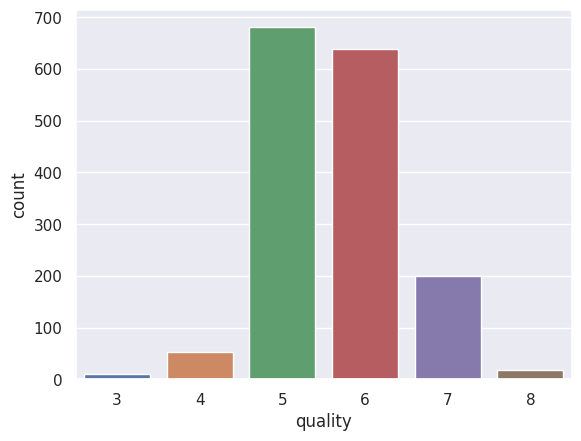

In [ ]:
sns.countplot(x="quality", data=wine_dataset)
plt.show()

KeyboardInterrupt: ignored

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


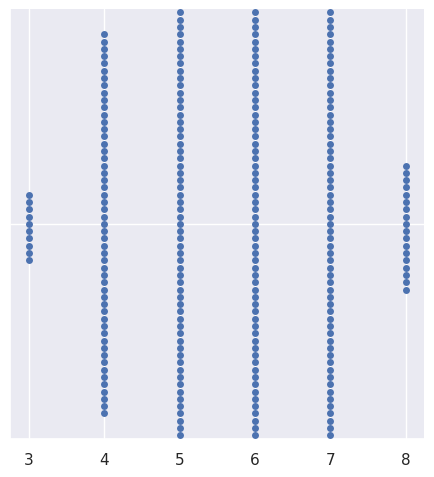

In [ ]:
sns.catplot(x='quality', data = wine_dataset, kind = 'cpunt')

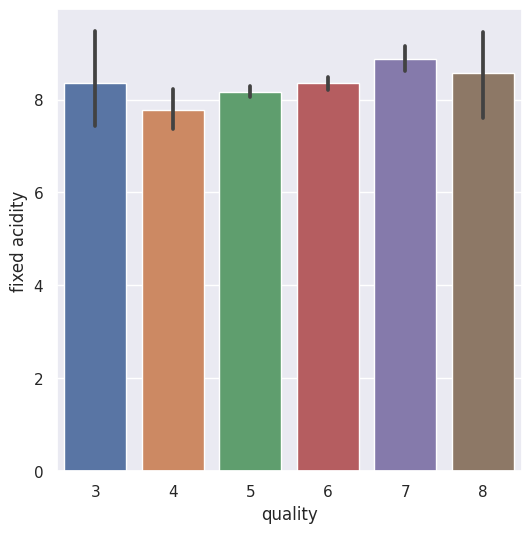

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="quality", y="fixed acidity", data = wine_dataset)
plt.show()

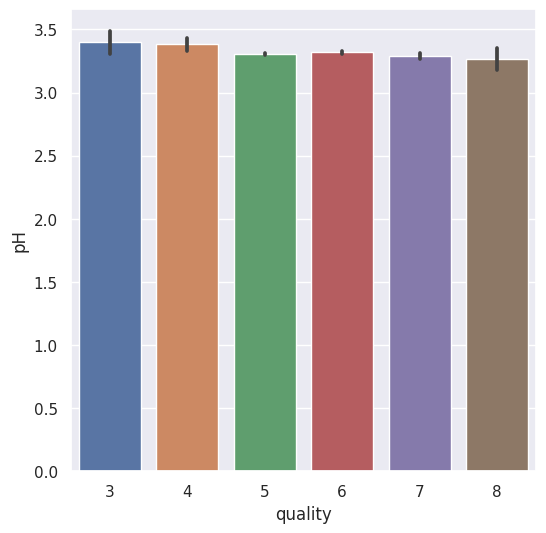

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="quality", y="pH", data = wine_dataset)
plt.show()

In [ ]:
correlation = wine_dataset.corr()

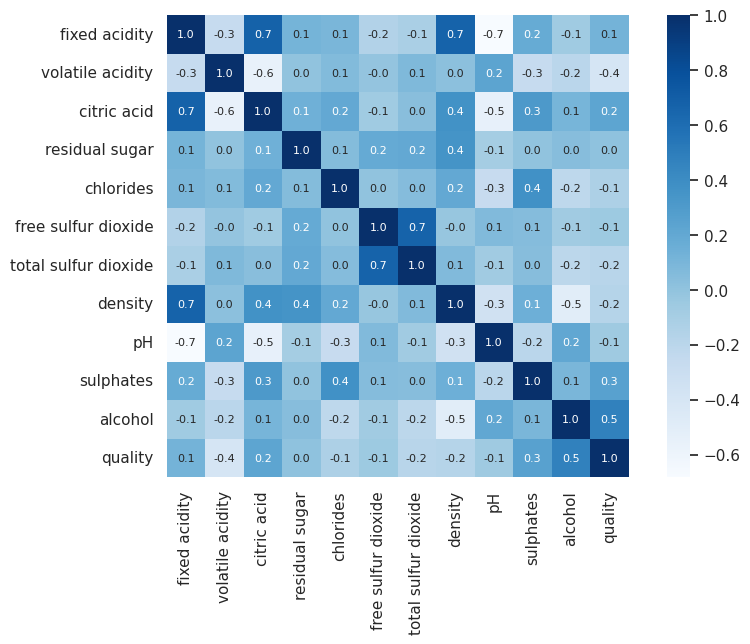

In [ ]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,6))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8}, cmap= 'Blues')
plt.show()

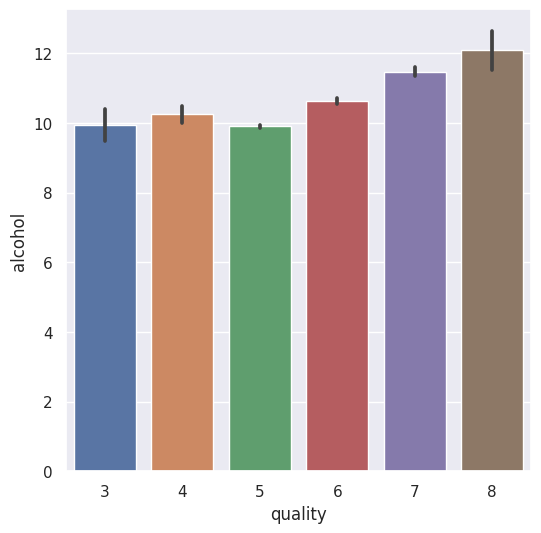

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="quality", y="alcohol", data = wine_dataset)
plt.show()

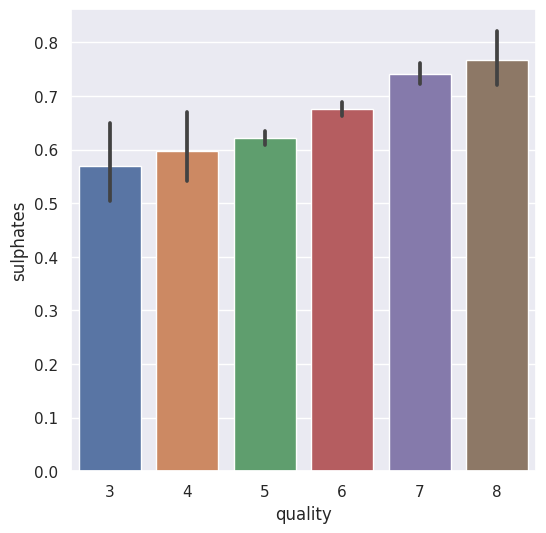

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="quality", y="sulphates", data = wine_dataset)
plt.show()

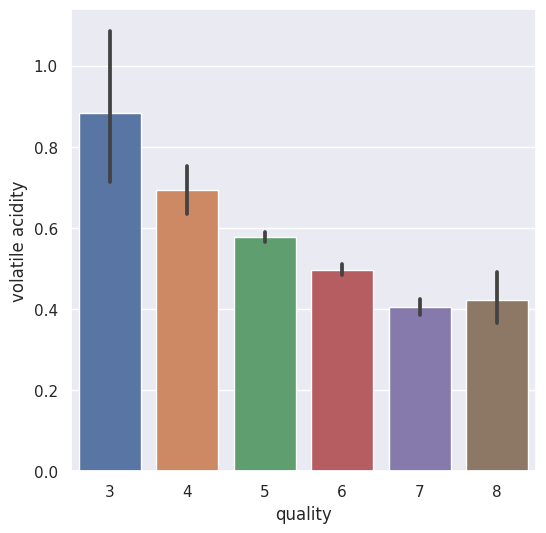

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="quality", y="volatile acidity", data = wine_dataset)
plt.show()

In [ ]:
X = wine_dataset.drop(columns="quality", axis=1)
Y = wine_dataset["quality"]

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
print(Y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#prediction on training data
pred_train_data = model.predict(X_train)


In [ ]:
#accuracy score
acc_scr = accuracy_score(pred_train_data, Y_train)

In [ ]:
print(acc_scr)

1.0


In [ ]:
#pred on testing data
pred_test_data = model.predict(X_test)
print(pred_test_data)



[5 5 6 6 5 6 5 6 5 5 6 5 5 5 7 5 6 5 7 7 7 5 6 5 5 5 5 6 5 6 5 6 5 6 5 5 6
 5 5 6 6 5 7 6 5 5 6 5 5 6 5 6 6 6 6 5 5 5 5 5 5 5 5 6 6 6 5 6 5 6 6 5 5 5
 6 6 6 5 6 6 6 6 5 6 5 5 5 5 6 5 6 6 6 5 5 6 5 5 6 7 6 5 6 6 6 5 5 5 5 6 6
 5 7 6 5 5 5 5 6 6 6 5 6 5 6 6 6 6 6 5 5 6 6 5 7 5 6 5 5 6 5 7 5 5 6 5 6 6
 6 5 5 6 6 5 5 6 6 5 5 6 6 6 6 7 5 6 5 6 5 5 6 7 5 6 6 5 5 5 6 6 7 6 6 6 5
 6 5 6 7 6 6 7 5 5 6 5 6 6 6 5 5 5 7 6 6 5 5 7 5 5 6 5 5 6 6 6 6 5 5 5 5 5
 6 5 6 5 6 5 6 5 6 5 5 6 5 5 5 7 5 5 6 6 6 5 7 7 6 5 5 6 5 5 6 6 5 5 7 5 6
 5 7 7 6 6 5 8 5 6 5 5 6 6 6 6 7 6 5 5 5 5 6 5 5 6 5 6 5 5 6 6 5 7 5 5 6 6
 5 6 6 7 6 7 6 6 6 5 5 6 5 5 6 5 6 6 6 5 5 6 5 5]


In [ ]:
#accuracy score
acc_scr_test = accuracy_score(pred_test_data, Y_test)
acc_scr_test

0.734375

In [ ]:
#building a predictive model
input_Data = wine_dataset.iloc[0, :12]
input_Data_np = np.asarray(input_Data)
input_data_reshaped = input_Data_np.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print("The quality of the win")

The quality of the wine is: [5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
